# Campo eléctrico de cargas puntuales

Las lineas del campo eléctrico so curvas integrales del campo vectorial $\vec{E}$, es decir, curvas cuyas lineas tangentes en cada punto son paralelas al campo eléctrico en dicho punto. La magnitud del campo es proporcional a la densidad de lineas de campo.

Por tanto, el flujo eléctrico $\Phi_E = \int_{S} \vec{E}\cdot d\vec{A}$ es proporcioal al número de lineas que cruzan la superficie. Las líneas de campo salen de cargas positivas y entran en las negativas.

Las *superficies equipotenciales* son aquellas en las que el potencial eléctrico tiene un valor fijo, son cerradas y $\vec{E}$ es perpendicular a ellas (ya que es la dirección de mayor variación de V). Las secciones en sección transversal de estas superficies son curvas cerradas llamadas *lineas equipotenciales*.

Para la realización de las lineas de campo es necesario discretizarlas y esto se logra tomando puntos del espacio y calculando E para de ahí obtener una linea paralela. 


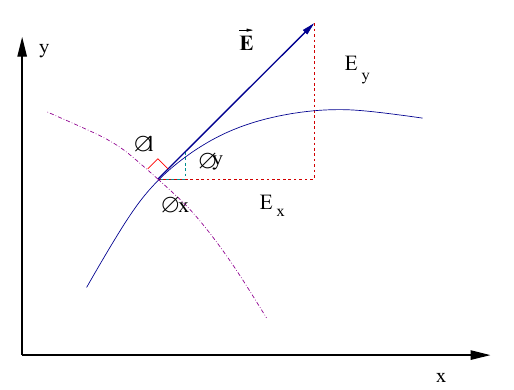
![](LineasCampos.png)

Por triángulos semejantes, tenemos:

$\Delta x = \Delta l \dfrac{E_x}{E}, \qquad \Delta y = \Delta l \dfrac{E_y}{E}$

Para las lineas equipotenciales usamos el hecho que E es perpendicular a ellas en todos los puntos. Si $(\Delta x, \Delta y)$ está en la dirección tangencial de una linea de campo, entonces $(-\Delta y , \Delta x)$ está e la dirección perpendicular (se comprueba rápido con un producto punto). Por ende, las ecuacioes que dan las lineas equipotenciales son:


$\Delta x = - \Delta l \dfrac{E_y}{E}, \qquad \Delta y = - \Delta l \dfrac{E_x}{E}$

El algoritmo:
* 1. Escoger un punto inicial (x0, y0) que pertenecerá a la única linea a dibujar. 
    
* 2. Calcular E en dicho punto. 
    
* 3. Usar un $\Delta l$ pequeño y calcular $\Delta x$ y $\Delta y$. 
    
* 4. Hacer la sustitución $x \to x + \Delta x$ y $y \to y + \Delta y$. 
    
* 5. Repetir hasta alcanzar un criterio de terminación, por ejemplo, cuando la linea de campo supere un área de dibujado o se acerque a la carga más cerca de una distancia mínima. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [2]:
nx = 100; ny = 50              #Discretización en x y y
x = np. linspace(-5, 5, nx);  y = np.linspace(-5, 5, ny)  # Rango en x y y
X, Y = np.meshgrid(x, y) # Meshgrid
E = np.zeros([nx, ny])  # Campo eléctrico

In [3]:
def EField(q, rs, rd):
    # q -> charge
    # rs -> (x, y)    espacial 
    # rd -> (x', y') distribución
    den = np.hypot(rs[0]-rd[0], rs[1]-rd[1])**3
    Ex = q*(rs[0] - rd[0])/den
    Ey = q*(rs[1] - rd[1])/den
    return Ex, Ey

## Líneas de campo de una carga puntual

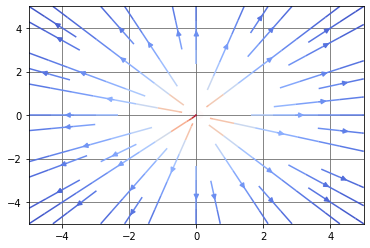

In [4]:

Ex, Ey = EField(1, [X, Y], [0, 0])
color = np.log(np.hypot(Ex, Ey))
fig = plt.figure ()
ax = fig.add_subplot (111)
ax.streamplot(x, y, Ex, Ey, color = color, cmap=plt.cm.coolwarm, density=0.5)
circle1 = plt.Circle((0, 0), 0.2, color='snow')
ax.add_artist(circle1)
ax.grid(True, color='dimgray')
ax.set_facecolor("white")



## Lineas de campo de un par de cargas (dipolo e iguales)

Ahora veamos la superposición de los campos de dos cargas puntuales

In [5]:
#Discretización del plano
nx = ny = 100
x = y = np.linspace(-10, 10, nx)
X, Y = np.meshgrid(x, y)

In [15]:
#Definimos los campos con cargas q1(-1,0) y q2(1, 0)
Ex1, Ey1 = EField(1, [X, Y], [-3, 0])
Ex2, Ey2 = EField(1, [X, Y], [3, 0])

In [16]:
#Principio de superposición
Ex = Ex1 + Ex2 
Ey = Ey1 + Ey2

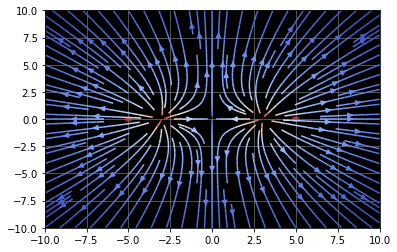

In [17]:
#Graficación
color = np.log(np.hypot(Ex, Ey)) #Escala de colores
fig = plt.figure()
ax = fig.add_subplot (111)
ax.streamplot(x, y, Ex, Ey, color = color, cmap=plt.cm.coolwarm, density=1.5)
circle1 = plt.Circle((5, 0), 0.2, color='firebrick')
circle2 = plt.Circle((-5, 0), 0.2, color='firebrick')
ax.add_artist(circle1); ax.add_artist(circle2)
ax.grid(True, color='dimgray')
ax.set_facecolor("black")

Ahora una carga positiva y negativa

In [ ]:
#Discretización del plano
nx = ny = 100
x = y = np.linspace(-10, 10, nx)
X, Y = np.meshgrid(x, y)

In [ ]:
#Definimos los campos con cargas q1(-1,0) y q2(1, 0)
Ex1, Ey1 = EField(1, [X, Y], [-1, 0])
Ex2, Ey2 = EField(-1, [X, Y], [1, 0])

In [ ]:
#Principio de superposición
Ex = Ex1 + Ex2 
Ey = Ey1 + Ey2

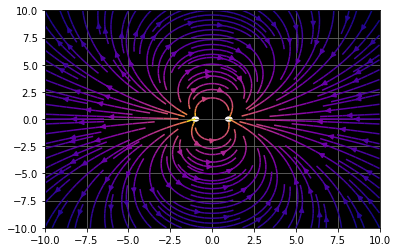

In [ ]:
#Graficación
color = np.log(np.hypot(Ex, Ey)) #Escala de colores
fig = plt.figure()
ax = fig.add_subplot (111)
ax.streamplot(x, y, Ex, Ey, color = color, cmap=plt.cm.plasma, density=1.5)
circle1 = plt.Circle((1, 0), 0.2, color='snow')
circle2 = plt.Circle((-1, 0), 0.2, color='snow')
ax.add_artist(circle1); ax.add_artist(circle2)
ax.grid(True, color='dimgray')
ax.set_facecolor("black")

## Cuadripolo eléctrico


Cuatro cargas

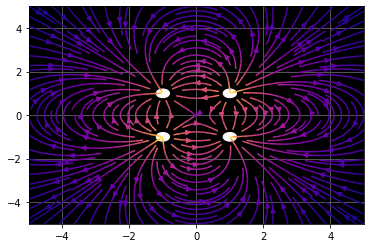

In [ ]:
#Discretización del plano
nx = ny = 100
x = y = np.linspace(-5, 5, nx)
X, Y = np.meshgrid(x, y)

#Definimos los campos con cargas q(1,1), -q(1, -1), q(-1, -1), -q(-1, 1)
Ex1, Ey1 = EField(1, [X, Y], [1, 1])
Ex2, Ey2 = EField(-1, [X, Y], [1, -1])
Ex3, Ey3 = EField(1, [X, Y], [-1, -1])
Ex4, Ey4 = EField(-1, [X, Y], [-1, 1])

#Principio de superposición
Ex = Ex1 + Ex2 + Ex3 + Ex4 
Ey = Ey1 + Ey2 + Ey3 + Ey4

#Graficación
color = np.log(np.hypot(Ex, Ey)) #Escala de colores
fig = plt.figure()
ax = fig.add_subplot (111)
ax.streamplot(x, y, Ex, Ey, color = color, cmap=plt.cm.plasma, density=1.5) #Streamplot
circle1 = plt.Circle((1, 1), 0.2, color='snow') #Partícula 1
circle2 = plt.Circle((1, -1), 0.2, color='snow') #Partícula 2
circle3 = plt.Circle((-1, -1), 0.2, color='snow') #Partícula 3
circle4 = plt.Circle((-1, 1), 0.2, color='snow') #Partícula 4
ax.add_artist(circle1); ax.add_artist(circle2); ax.add_artist(circle3); ax.add_artist(circle4)
ax.grid(True, color='dimgray')
ax.set_facecolor("black")